In [24]:
# import all the required libraries
import pandas as pd
import numpy as np
from collections import Counter
import re
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
#load data
df = pd.read_csv("Emotion_Balanced_7200.csv")

In [25]:
# total unique features in the dataset
uniquewords = pd.Series(' '.join(df['content']).split()).value_counts()
uniquewords.count()

10206

In [26]:
# Classifiying the labels are by calling the function and put it in new column Emot
df['Emot'] = df['Emotion']

In [27]:
# Counts the total features for each classifier
Counter(df["Emot"])

Counter({'love': 1250,
         'joy': 1250,
         'surprise': 1250,
         'sadness': 1250,
         'fear': 1250,
         'anger': 1250})

In [28]:
# connvert the features into lowercase
df['content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [29]:
df['content'] = df['content'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [30]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="@"))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [31]:
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x[0]!="#"))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3      i actually didnt feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [32]:
# Do the spell check
df['content'] = df['content'].apply(lambda x: str(TextBlob(x).correct()))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [33]:
df['content'] = df['content'].str.replace('\d+', '')
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [34]:
df['content'] = df['content'].map(lambda x: re.sub(r'\W+', ' ', x))
df['content'].head()

0    i maybe i up being now smaller compared people...
1    a friend of mine often had difficulties with h...
2    i absolutely love her and feel accepted by her...
3       i actually didn feel anything which shocked me
4    i actually feel a strange return to the way i ...
Name: content, dtype: object

In [35]:
# Remove the stopwords
stop = stopwords.words('english')
df['content'] = df['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['content'].head()

0    maybe smaller compared people face really taug...
1    friend mine often difficulties parents child b...
2                 absolutely love feel accepted weight
3                       actually feel anything shocked
4    actually feel strange return way felt early tw...
Name: content, dtype: object

In [36]:
st = SnowballStemmer("english")
df['content'] = df['content'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['content'].head()

0    mayb smaller compar peopl face realli taught f...
1    friend mine often difficulti parent child bett...
2                      absolut love feel accept weight
3                              actual feel anyth shock
4    actual feel strang return way felt earli twent...
Name: content, dtype: object

In [37]:
x = df.content
y = df.Emot

In [38]:
SEED = 100
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=SEED)

In [39]:

print("Train set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear, {6:.2f}% surprise".format(len(x_train),
                                                                              (len(x_train[y_train == "sadness"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "joy"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "love"]) / (len(x_train)*1.))*100,
                                                                            (len(x_train[y_train == "anger"]) / (len(x_train)*1.))*100,
                                                                             (len(x_train[y_train == "fear"]) / (len(x_train)*1.))*100,                                                                        
                                                                            (len(x_train[y_train == "surprise"]) / (len(x_train)*1.))*100))
print("Test set has total {0} entries with {1:.2f}% sadness, {2:.2f}% joy, {3:.2f}% love, {4:.2f}% anger, {5:.2f}% fear , {6:.2f}% surprise".format(len(x_test),
                                                                             (len(x_test[y_test == "sadness"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "joy"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "love"]) / (len(x_test)*1.))*100,
                                                                            (len(x_test[y_test == "anger"]) / (len(x_test)*1.))*100,
                                                                             (len(x_test[y_test == "fear"]) / (len(x_test)*1.))*100,                                                                        
                                                                            (len(x_test[y_test == "surprise"]) / (len(x_test)*1.))*100))

Train set has total 5250 entries with 17.12% sadness, 16.38% joy, 16.82% love, 16.42% anger, 16.70% fear, 16.55% surprise
Test set has total 2250 entries with 15.60% sadness, 17.33% joy, 16.31% love, 17.24% anger, 16.58% fear , 16.93% surprise


In [40]:
def accuracy_summary(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
#     print("accuracy score: {0:.2f}%".format(accuracy*100)) 
#     print("-"*80) 
    return accuracy

In [41]:
def nfeature_accuracy_checker(vectorizer, n_features, stop_words, ngram_range, classifier):
    result = []
#     print (classifier)
#     print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
#         print("Validation result for {} features".format(n)) 
        nfeature_accuracy = accuracy_summary(checker_pipeline, x_train, y_train, x_test, y_test)
        result.append((n,nfeature_accuracy))
    return result

In [42]:
def plot_feature_comparision(ug, bg, tg):
    nfeatures_plot_tg = pd.DataFrame(tg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_bg = pd.DataFrame(bg,columns=['nfeatures','validation_accuracy'])
    nfeatures_plot_ug = pd.DataFrame(ug,columns=['nfeatures','validation_accuracy'])

    plt.figure(figsize=(8,6))
    plt.plot(nfeatures_plot_tg.nfeatures, nfeatures_plot_tg.validation_accuracy,label='trigram')
    plt.plot(nfeatures_plot_bg.nfeatures, nfeatures_plot_bg.validation_accuracy,label='bigram')
    plt.plot(nfeatures_plot_ug.nfeatures, nfeatures_plot_ug.validation_accuracy, label='unigram')
    plt.title("N-gram(1~3) test result : Accuracy")
    plt.xlabel("Number of features")
    plt.ylabel("Validation set accuracy")
    plt.legend()
    return;

In [43]:
def get_best_ngrams(cvec, n_features, stp, cls):
    ngs = [
    (1,1),
    (1,2),
    (1,3)]
    feature_result_ug = ''
    feature_result_bg = ''
    feature_result_tg = ''
    for ng in ngs:
        if ng == (1,1):
#             print("RESULT FOR UNIGRAM\n") 
            feature_result_ug = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,2):
#             print("RESULT FOR BIGRAM\n")
            feature_result_bg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
        elif ng == (1,3):
#             print("RESULT FOR TRIGRAM\n") 
            feature_result_tg = nfeature_accuracy_checker(cvec, n_features, stp, ng, cls)
    print (cls)
    plot_feature_comparision(feature_result_ug, feature_result_bg, feature_result_tg)
    return;

In [44]:
def train_test_and_evaluate(pipeline, x_train, y_train, x_test, y_test):
    sentiment_fit = pipeline.fit(x_train, y_train)
    y_pred = sentiment_fit.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    conmat = np.array(confusion_matrix(y_test, y_pred, labels=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']))
    confusion = pd.DataFrame(conmat, index=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
                         columns=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
    print("accuracy score: {0:.2f}%".format(accuracy*100)) 
    print("-"*80)
    print("Confusion Matrix\n")
    print(confusion) 
    print("-"*80) 
    print("Classification Report\n") 
    print(classification_report(y_test, y_pred, target_names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])) 

In [45]:
def classifivation_report(mf, ng, spl):
    ug_cvec = TfidfVectorizer(max_features=mf, ngram_range=ng)
    ug_pipeline = Pipeline([
            ('vectorizer', ug_cvec),
            ('classifier', cls)
        ])
    sentiment_fit = train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)
    cv_kfold(spl, ug_pipeline)
    return sentiment_fit, ug_pipeline;

In [46]:
# this function performs K-fold cross valdation for K=10
def cv_kfold(spl, pipeline):
    kf = KFold(n_splits=spl, shuffle=True)
    kf.get_n_splits(x)
    print(kf) 
    accuracy_kfold = 0
    accuracy_kfold_avg = 0
    for train_index, test_index in kf.split(x):
        x_train_cv, x_test_cv = x[train_index], x[test_index]
        y_train_cv, y_test_cv = y[train_index], y[test_index]

        accuracy_kfold_avg
        accuracy_kfold
        fit = pipeline.fit(x_train_cv, y_train_cv)
        y_pred_cv = fit.predict(x_test_cv)
        accuracy_kfold = accuracy_score(y_test_cv, y_pred_cv)
        accuracy_kfold_avg = accuracy_kfold_avg + accuracy_score(y_test_cv, y_pred_cv)
        print(accuracy_kfold)

    print("Avg Accuracy",accuracy_kfold_avg/kf.get_n_splits())

In [47]:
freq = pd.Series(' '.join(df['content']).split()).value_counts()
freq.count()

5829

In [48]:
tv = TfidfVectorizer()
n_features = np.arange(1500,6001,500)
stp = None

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)


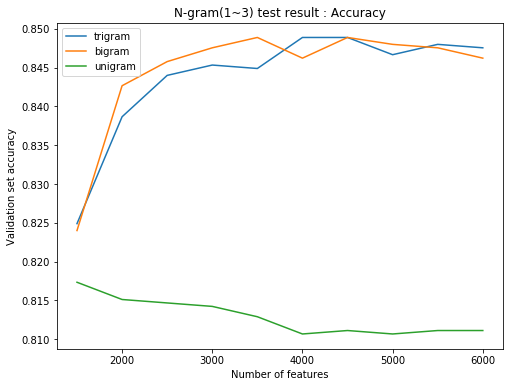

In [49]:
cls = LogisticRegression(solver='newton-cg', multi_class='multinomial')
get_best_ngrams(tv, n_features, stp, cls)

In [50]:
mf_ = 3500
ng_ = (1,2)
spl_ = 10
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 84.89%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       302   18     6     11    10         4
joy            23  307    39      7     8         6
love           13   23   325      2     1         3
anger          36   14    17    306    14         1
fear           12    7     3     13   309        29
surprise        4    5     2      1     8       361
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.90      0.79      0.84       388
         joy       0.88      0.83      0.85       373
        love       0.82      0.79      0.80       390
       anger       0.83      0.89      0.86       367
        fear       0.77      0.86      0.82       351
    surprise       0.89      0.95      0.92       381

   micro avg       0.85      0

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


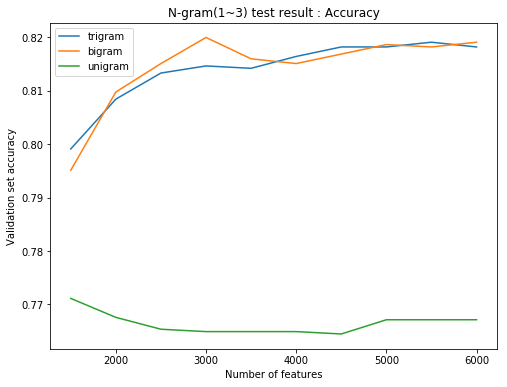

In [51]:
cls = MultinomialNB()
get_best_ngrams(tv, n_features, stp, cls)

In [52]:
mf_ = 3000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 82.00%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       284   13    10     13    19        12
joy            19  275    55      9    17        15
love            9   21   322      3     6         6
anger          28   11    19    301    20         9
fear           10    5     5     15   310        28
surprise        2    7     7      2    10       353
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.88      0.78      0.82       388
         joy       0.81      0.83      0.82       373
        love       0.83      0.71      0.76       390
       anger       0.77      0.88      0.82       367
        fear       0.81      0.81      0.81       351
    surprise       0.83      0.93      0.88       381

   micro avg       0.82      0

In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# ug_cvec = CountVectorizer(max_features=70000, ngram_range=(1, 3))
# ug_pipeline = Pipeline([
#         ('vectorizer', ug_cvec),
#         ('classifier', cls)
#     ])
# train_test_and_evaluate(ug_pipeline, x_train, y_train, x_test, y_test)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


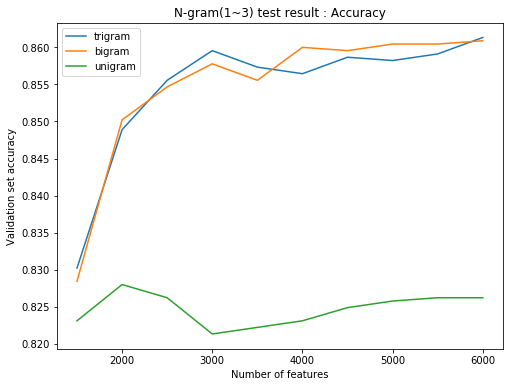

In [53]:
cls = LinearSVC()
get_best_ngrams(tv, n_features, stp, cls)

In [54]:
mf_ = 5000
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 86.04%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       298   17    10      9    12         5
joy            11  315    41      4    11         8
love           12   25   325      1     2         2
anger          23   10    12    325    16         2
fear            9    8     2     12   315        27
surprise        2    5     5      3     8       358
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.92      0.84      0.88       388
         joy       0.87      0.84      0.85       373
        love       0.83      0.81      0.82       390
       anger       0.82      0.89      0.85       367
        fear       0.84      0.85      0.84       351
    surprise       0.89      0.94      0.91       381

   micro avg       0.86      0

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)


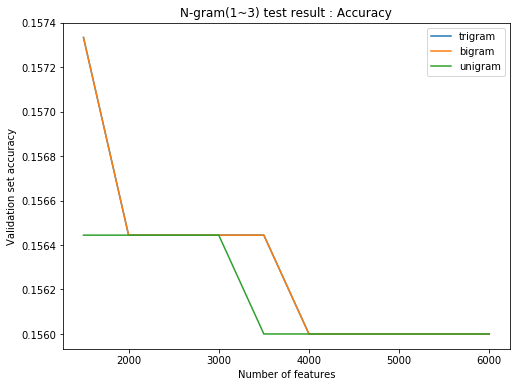

In [55]:
cls = SVC(kernel='rbf', random_state=0, gamma=.01, C=1)
get_best_ngrams(tv, n_features, stp, cls)

In [56]:
mf_ = 3500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 15.64%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       351    0     0      0     0         0
joy           390    0     0      0     0         0
love          367    0     0      0     0         0
anger         388    0     0      0     0         0
fear          373    0     0      0     0         0
surprise      380    0     0      0     0         1
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.00      0.00      0.00       388
         joy       0.00      0.00      0.00       373
        love       0.00      0.00      0.00       390
       anger       0.00      0.00      0.00       367
        fear       0.16      1.00      0.27       351
    surprise       1.00      0.00      0.01       381

   micro avg       0.16      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.15466666666666667
0.14533333333333334
0.156
0.16133333333333333
0.23733333333333334
0.19066666666666668
0.248
0.164
0.15466666666666667
0.14933333333333335
Avg Accuracy 0.17613333333333334


C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)


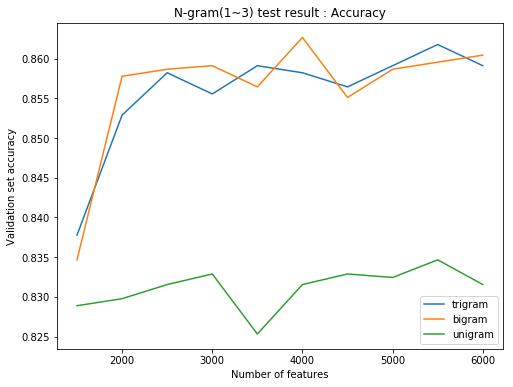

In [57]:
cls = SGDClassifier()
get_best_ngrams(tv, n_features, stp, cls)

In [60]:
mf_ = 5500
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 86.18%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       296   17     7     10    14         7
joy            14  300    45     10    13         8
love           14   20   325      2     4         2
anger          21    7    11    331    16         2
fear            7    5     0     12   319        30
surprise        1    2     3      2     5       368
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.90      0.85      0.88       388
         joy       0.86      0.86      0.86       373
        love       0.85      0.77      0.81       390
       anger       0.83      0.89      0.86       367
        fear       0.84      0.84      0.84       351
    surprise       0.88      0.97      0.92       381

   micro avg       0.86      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8906666666666667
0.8826666666666667
0.8986666666666666
0.8853333333333333
0.8773333333333333
0.8786666666666667
0.852
0.86
0.8706666666666667
0.8866666666666667
Avg Accuracy 0.8782666666666668


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


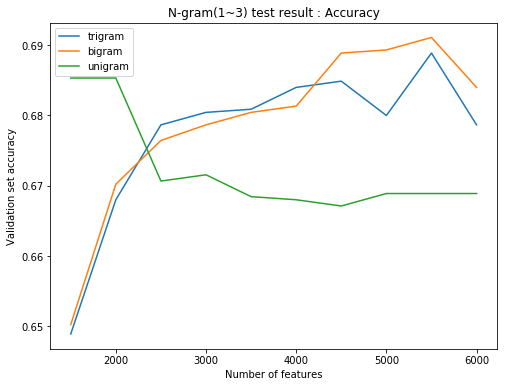

In [61]:
cls = KNeighborsClassifier()
get_best_ngrams(tv, n_features, stp, cls)

In [62]:
mf_ = 5500
ng_ = (1,2)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 69.11%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       235   35    14     32    19        16
joy            16  253    37     37    25        22
love           14   34   259     29    21        10
anger          20   24    19    285    20        20
fear           19   14     9     43   255        33
surprise       14   21    25     22    31       268
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.64      0.73      0.68       388
         joy       0.69      0.68      0.69       373
        love       0.66      0.65      0.66       390
       anger       0.71      0.71      0.71       367
        fear       0.74      0.67      0.70       351
    surprise       0.73      0.70      0.71       381

   micro avg       0.69      0

C:\Users\Kopal-PC\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


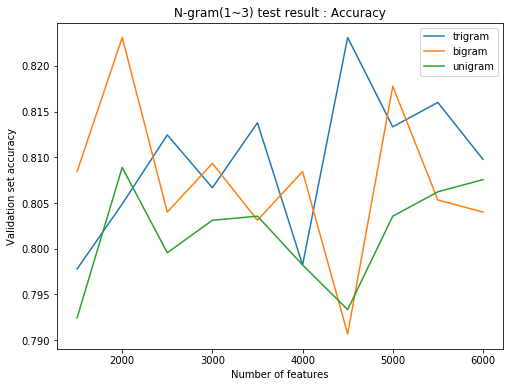

In [64]:
cls = RandomForestClassifier()
get_best_ngrams(tv, n_features, stp, cls)

In [66]:
mf_ = 4500
ng_ = (1,3)
sentiment_fit, ug_pipeline = classifivation_report(mf_, ng_, spl_)

accuracy score: 80.09%
--------------------------------------------------------------------------------
Confusion Matrix

          sadness  joy  love  anger  fear  surprise
sadness       251   45    18     18    11         8
joy            66  250    47     10     9         8
love           10   16   336      1     2         2
anger          28   12    17    313    15         3
fear           11    7     8     23   293        31
surprise        5    1     8      1     7       359
--------------------------------------------------------------------------------
Classification Report

              precision    recall  f1-score   support

     sadness       0.86      0.81      0.83       388
         joy       0.87      0.79      0.83       373
        love       0.76      0.64      0.69       390
       anger       0.77      0.92      0.84       367
        fear       0.68      0.72      0.70       351
    surprise       0.87      0.94      0.91       381

   micro avg       0.80      0